# Plot LST/NDVI

## Introduction

After computing the mean, median, minimum, maximum, and standard deviation of LST/NDVI in each HOLC division and summarizing those values by HOLC grade and borough, we want to plot the results. This notebook generates box-and-whisker plots of the aggregated summary statistics. Line plots are generated to show LST/NDVI over time. 

## Data

Data is imported from the `02-data/summary_stats_agg/` folder. Two CSV files, one for LST and one for NDVI, summarizing the mean of the HOLC boundary summary statistics are imported. Each line of the CSV file contains the Landsat identifier and the mean values of the mean, median, minimum, maximum, and standard deviation for each HOLC division.

Figures are exported to the `03-figs/` folder of the parent directory.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DIR_PARENT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DIR_DATA = DIR_PARENT + "/02-data"
DIR_STATS_AGG = DIR_DATA + "/summary_stats_agg"

DIR_FIGS = DIR_PARENT + "/03-figs"

# START FUNCTION DEFINITIONS
def convertKtoF(tempK):
    return (tempK-273.15)*9/5+32 

def parse_date_source_file_col(df):
    return pd.to_datetime(df["source_file"].apply(lambda x: x.split("_")[5]))

def datetime_year(y): 
    return pd.to_datetime("1Jan"+str(y))

# START FILE IMPORT
lst_stats = pd.read_csv(DIR_STATS_AGG + "/lst_mean_stats_combined.csv")
ndvi_stats = pd.read_csv(DIR_STATS_AGG + "/ndvi_mean_stats_combined.csv")

# Drop the row that contains the HOLC grade E. This comes from the Bronx 
# boundary file. 
lst_stats = lst_stats[lst_stats["holc_grade"]!="E"]
ndvi_stats = ndvi_stats[ndvi_stats["holc_grade"]!="E"]

# Add a datetime column to the data
lst_stats["datetime"] = parse_date_source_file_col(lst_stats)
ndvi_stats["datetime"] = parse_date_source_file_col(ndvi_stats)

### Box Plot of NYC LST data

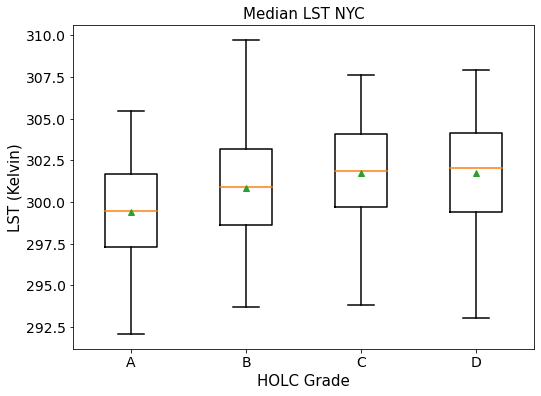

In [24]:
plt.rcParams["figure.figsize"] = (8,6)

font_size = 15
column_choice = "median" # OPTIONS: median, mean, min, max, std

ax = lst_stats[lst_stats["loc_year"]=="NYC"].boxplot(
                column=[column_choice], 
                by=["holc_grade"],
                grid=False,
                showmeans=True,
                showfliers=False,
                color=dict(boxes='r', whiskers='r', medians='r', 
                           caps='r'),
                boxprops=dict(linestyle='-', linewidth=1.5),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5),
                capprops=dict(linestyle='-', linewidth=1.5),
                fontsize=font_size-1)

ax.set_xlabel("HOLC Grade", fontsize=font_size)
ax.set_ylabel("LST (Kelvin)", fontsize=font_size)
fig = ax.get_figure()
fig.suptitle("") # Remove default Pandas title
plt.title("Median LST NYC", fontsize=font_size)
plt.savefig(DIR_FIGS + "/boxplot_nyc_"+column_choice+"_lst.png",
            bbox_inches="tight")


### Box plot of LST by borough

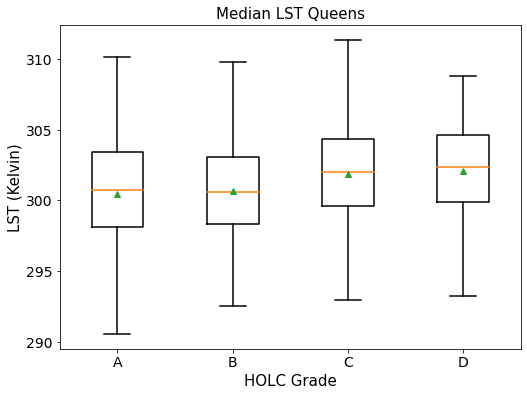

In [34]:
loc_years = ["NYBrooklyn1938","NYBronx1938","NYManhattan1937",
             "NYStatenIsland1940","NYQueens1938"]
labels = ["Brooklyn","Bronx","Manhattan","StatenIsland","Queens"]

column_choice = "median" # OPTIONS: median, mean, min, max, std
loc_year_choice = 4 # OPTIONS: 0 through 4

plt.rcParams["figure.figsize"] = (8,6)
font_size = 15
ax = lst_stats[lst_stats["loc_year"]==loc_years[loc_year_choice]].boxplot(
                column=[column_choice], 
                by=["holc_grade"],
                grid=False,
                showmeans=True,
                showfliers=False,
                color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                boxprops=dict(linestyle='-', linewidth=1.5),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5),
                capprops=dict(linestyle='-', linewidth=1.5),
                fontsize=font_size-1)

ax.set_xlabel("HOLC Grade", fontsize=font_size)
ax.set_ylabel("LST (Kelvin)", fontsize=font_size)
fig = ax.get_figure()
fig.suptitle("") # Remove default Pandas title
plt.title("Median LST " + labels[loc_year_choice], fontsize=font_size)
plt.savefig(DIR_FIGS + "/boxplot_"+labels[loc_year_choice]+"_"+
            column_choice+"_lst.png",bbox_inches = "tight")

### Box plot of NDVI NYC

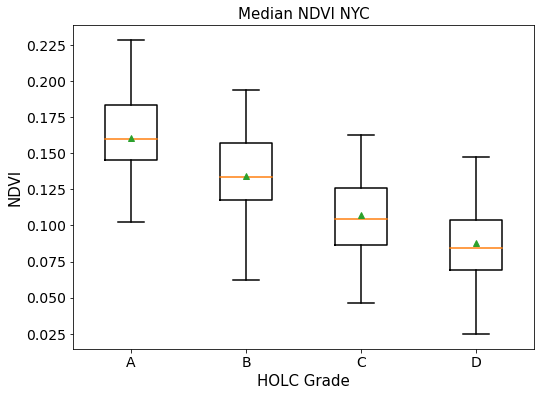

In [26]:
plt.rcParams["figure.figsize"] = (8,6)

font_size = 15
column_choice = "median" # OPTIONS: median, mean, min, max, std

ax = ndvi_stats[ndvi_stats["loc_year"]=="NYC"].boxplot(
                column=[column_choice], 
                by=["holc_grade"],
                grid=False,
                showmeans=True,
                showfliers=False,
                color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                boxprops=dict(linestyle='-', linewidth=1.5),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5),
                capprops=dict(linestyle='-', linewidth=1.5),
                fontsize=font_size-1)

ax.set_xlabel("HOLC Grade", fontsize=font_size)
ax.set_ylabel("NDVI", fontsize=font_size)
fig = ax.get_figure()
fig.suptitle("") # Remove default Pandas title
plt.title("Median NDVI NYC", fontsize=font_size) # Remove the rest of default title
plt.savefig(DIR_FIGS + "/boxplot_nyc_"+column_choice+"_ndvi.png",
            bbox_inches="tight")

### Box plot of NDVI by borough

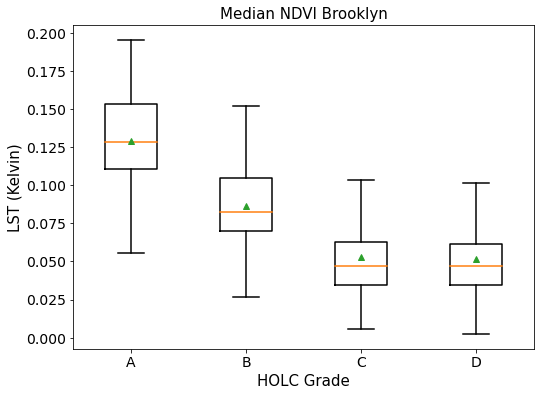

In [27]:
loc_years = ["NYBrooklyn1938","NYBronx1938","NYManhattan1937",
             "NYStatenIsland1940","NYQueens1938"]
labels = ["Brooklyn","Bronx","Manhattan","StatenIsland","Queens"]

column_choice = "median" # OPTIONS: median, mean, min, max, std
loc_year_choice = 0 # OPTIONS: 0 through 4

plt.rcParams["figure.figsize"] = (8,6)
font_size = 15
ax = ndvi_stats[ndvi_stats["loc_year"]==loc_years[loc_year_choice]].boxplot(
                column=[column_choice], 
                by=["holc_grade"],
                grid=False,
                showmeans=True,
                showfliers=False,
                color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                boxprops=dict(linestyle='-', linewidth=1.5),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5),
                capprops=dict(linestyle='-', linewidth=1.5),
                fontsize=font_size-1)

ax.set_xlabel("HOLC Grade", fontsize=font_size)
ax.set_ylabel("LST (Kelvin)", fontsize=font_size)
fig = ax.get_figure()
fig.suptitle("") # Remove default Pandas title
plt.title("Median NDVI " + labels[loc_year_choice], fontsize=font_size)
plt.savefig(DIR_FIGS + "/boxplot_"+labels[loc_year_choice]+"_"+
            column_choice+"_ndvi.png")

### LST vs. Time

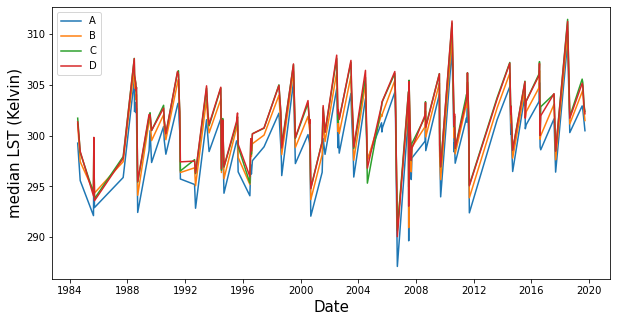

In [28]:
font_size = 15
column_choice = "median" # OPTIONS: median, mean, min, max, std

lst_stats_sorted = lst_stats.sort_values(by="datetime")

plt.rcParams["figure.figsize"] = (10,5)

xvals_nyc =  lst_stats_sorted[(
    lst_stats_sorted["holc_grade"]=="A") & \
    (lst_stats_sorted["loc_year"]=="NYC")]["datetime"].values

plt.plot(xvals_nyc, lst_stats_sorted[(
    lst_stats_sorted["holc_grade"]=="A") & \
    (lst_stats_sorted["loc_year"]=="NYC")][column_choice], label="A")
plt.plot(xvals_nyc, lst_stats_sorted[(
    lst_stats_sorted["holc_grade"]=="B") & \
    (lst_stats_sorted["loc_year"]=="NYC")][column_choice], label="B")
plt.plot(xvals_nyc, lst_stats_sorted[(
    lst_stats_sorted["holc_grade"]=="C") & \
    (lst_stats_sorted["loc_year"]=="NYC")][column_choice], label="C")
plt.plot(xvals_nyc, lst_stats_sorted[(
    lst_stats_sorted["holc_grade"]=="D") & \
    (lst_stats_sorted["loc_year"]=="NYC")][column_choice], label="D")

plt.legend(loc='upper left');

plt.xlabel("Date", fontsize = font_size)
plt.ylabel(column_choice + " LST (Kelvin)", fontsize=font_size)
# plt.title("Median")

plt.savefig(DIR_FIGS + "/"+column_choice+"-LST-vs-time.png")

### NDVI vs. Time

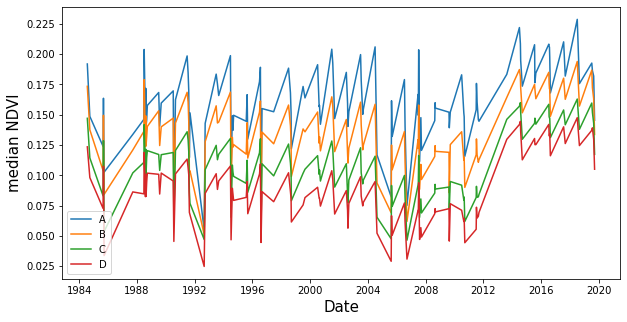

In [33]:
font_size = 15
column_choice = "median" # OPTIONS: median, mean, min, max, std

ndvi_stats_sorted = ndvi_stats.sort_values(by="datetime")

plt.rcParams["figure.figsize"] = (10,5)

xvals_nyc =  ndvi_stats_sorted[
    (ndvi_stats_sorted["holc_grade"]=="A") & \
    (ndvi_stats_sorted["loc_year"]=="NYC")]["datetime"].values

plt.plot(xvals_nyc, ndvi_stats_sorted[
    (ndvi_stats_sorted["holc_grade"]=="A") & \
    (ndvi_stats_sorted["loc_year"]=="NYC")][column_choice], label="A")
plt.plot(xvals_nyc, ndvi_stats_sorted[
    (ndvi_stats_sorted["holc_grade"]=="B") & \
    (ndvi_stats_sorted["loc_year"]=="NYC")][column_choice], label="B")
plt.plot(xvals_nyc, ndvi_stats_sorted[
    (ndvi_stats_sorted["holc_grade"]=="C") & \
    (ndvi_stats_sorted["loc_year"]=="NYC")][column_choice], label="C")
plt.plot(xvals_nyc, ndvi_stats_sorted[
    (ndvi_stats_sorted["holc_grade"]=="D") & \
    (ndvi_stats_sorted["loc_year"]=="NYC")][column_choice], label="D")

plt.legend(loc='lower left');
plt.xlabel("Date", fontsize = font_size)
plt.ylabel(column_choice + " NDVI", fontsize=font_size)
# plt.title("Median")

plt.savefig(DIR_FIGS + "/"+column_choice+"-NDVI-vs-time.png")

## Group results by decade

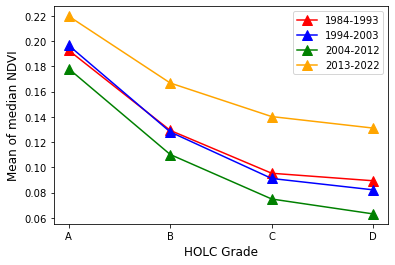

In [10]:
year_start = 1980
year_end = 1990
column_choice = "median" # OPTIONS: median, mean, min, max, std
df_to_plot = ndvi_stats # OPTIONS: lst_stats, ndvi_stats
####################################################################

df_decade1 = df_to_plot[
    (df_to_plot["datetime"] >= datetime_year(1984)) & \
    (df_to_plot["datetime"] < datetime_year(1994))]
df_decade2 = df_to_plot[
    (df_to_plot["datetime"] >= datetime_year(1994)) & \
    (df_to_plot["datetime"] < datetime_year(2004))]
df_decade3 = df_to_plot[
    (df_to_plot["datetime"] >= datetime_year(2004)) & \
    (df_to_plot["datetime"] < datetime_year(2013))]
df_decade4 = df_to_plot[
    (df_to_plot["datetime"] >= datetime_year(2013)) & \
    (df_to_plot["datetime"] <= datetime_year(2022))]

font_size = 12
HOLC_grade = ["A", "B", "C", "D"]

plt.plot(HOLC_grade, df_decade1.groupby("holc_grade").mean()[column_choice],
           marker="^", markersize=10, c="r", label="1984-1993")
plt.plot(HOLC_grade, df_decade2.groupby("holc_grade").mean()[column_choice],
           marker="^", markersize=10, c="b", label="1994-2003")
plt.plot(HOLC_grade, df_decade3.groupby("holc_grade").mean()[column_choice],
           marker="^", markersize=10, c="g", label="2004-2012")
plt.plot(HOLC_grade, df_decade4.groupby("holc_grade").mean()[column_choice],
           marker="^", markersize=10, c="orange", label="2013-2022")

plt.legend(loc="upper right")

if (df_to_plot["median"]==lst_stats["median"]).all(): 
    obs_label="LST" 
else: 
    obs_label="NDVI"

plt.xlabel("HOLC Grade", fontsize=font_size)
plt.ylabel("Mean of " + column_choice + " "+obs_label, fontsize=font_size)

plt.savefig(DIR_FIGS + "/"+column_choice+"-"+obs_label+
            "-vs-HOLC_decades.png")

### Plot the difference between from HOLC A

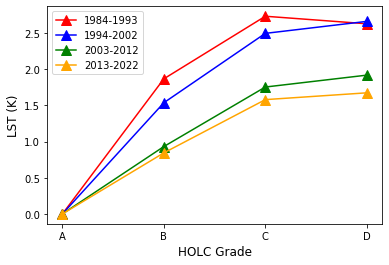

In [3]:
year_start = 1980
year_end = 1990
column_choice = "median" # OPTIONS: median, mean, min, max, std
df_to_plot = lst_stats # OPTIONS: lst_stats, ndvi_stats
####################################################################

df_decade1 = df_to_plot[(df_to_plot["datetime"] >= datetime_year(1984)) & \
          (df_to_plot["datetime"] < datetime_year(1994))]
df_decade2 = df_to_plot[(df_to_plot["datetime"] >= datetime_year(1994)) & \
          (df_to_plot["datetime"] < datetime_year(2004))]
df_decade3 = df_to_plot[(df_to_plot["datetime"] >= datetime_year(2004)) & \
          (df_to_plot["datetime"] < datetime_year(2013))]
df_decade4 = df_to_plot[(df_to_plot["datetime"] >= datetime_year(2013)) & \
          (df_to_plot["datetime"] <= datetime_year(2022))]

font_size = 12
HOLC_grade = ["A", "B", "C", "D"]

decade1_Amean = df_decade1.groupby("holc_grade").mean()[column_choice][0]
plt.plot(HOLC_grade, 
    abs(df_decade1.groupby("holc_grade").mean()[column_choice]-
    decade1_Amean),marker="^", markersize=10, c="r", label="1984-1993")

decade2_Amean = df_decade2.groupby("holc_grade").mean()[column_choice][0]
plt.plot(HOLC_grade, 
    abs(df_decade2.groupby("holc_grade").mean()[column_choice]-
    decade2_Amean),marker="^", markersize=10, c="b", label="1994-2002")

decade3_Amean = df_decade3.groupby("holc_grade").mean()[column_choice][0]
plt.plot(HOLC_grade, abs(
    df_decade3.groupby("holc_grade").mean()[column_choice]-decade3_Amean),
           marker="^", markersize=10, c="g", label="2003-2012")

decade4_Amean = df_decade4.groupby("holc_grade").mean()[column_choice][0]
plt.plot(HOLC_grade, abs(
    df_decade4.groupby("holc_grade").mean()[column_choice]-decade4_Amean),
           marker="^", markersize=10, c="orange", label="2013-2022")

plt.legend(loc="upper left")

if (df_to_plot["median"]==lst_stats["median"]).all(): 
    obs_label="LST (K)" 
else: 
    obs_label="NDVI"
    
# plt.title(obs_label + " - "+ obs_label + "(HOLC_A)")
plt.xlabel("HOLC Grade", fontsize=font_size)
plt.ylabel(obs_label, fontsize=font_size)

plt.savefig(DIR_FIGS + "/"+column_choice+"-"+obs_label+
            "-vs-HOLC_decades-difference.png")

**Check that the 2013-2022 catagory only contains Lansat 8 data.**

All the source file names of the `df_decade4` object contain LC08, so they all come from Landsat 8. 

In [19]:
df_decade4["source_file"].to_list()

['stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_20170304_01_T1.csv',
 'stats_ndvi_LC08_L1TP_013032_20140731_2